In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
df = pd.read_csv(r'https://github.com/sreerajva5/ML/raw/master/sample_data_ts.csv')

In [3]:
df.head(2)

,Date,vdcpd
0,14-04-2010,3.1
1,15-04-2010,2.8


In [4]:
df.isna().sum()

Date     0
vdcpd    0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    779 non-null    object 
 1   vdcpd   779 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779 entries, 0 to 778
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    779 non-null    datetime64[ns]
 1   vdcpd   779 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.3 KB


In [8]:
df.set_index('Date', inplace=True)

In [9]:
df.head()

,vdcpd
Date,
2010-04-14,3.1
2010-04-15,2.8
2010-04-16,3.5
2010-04-17,6.0
2010-04-18,7.4


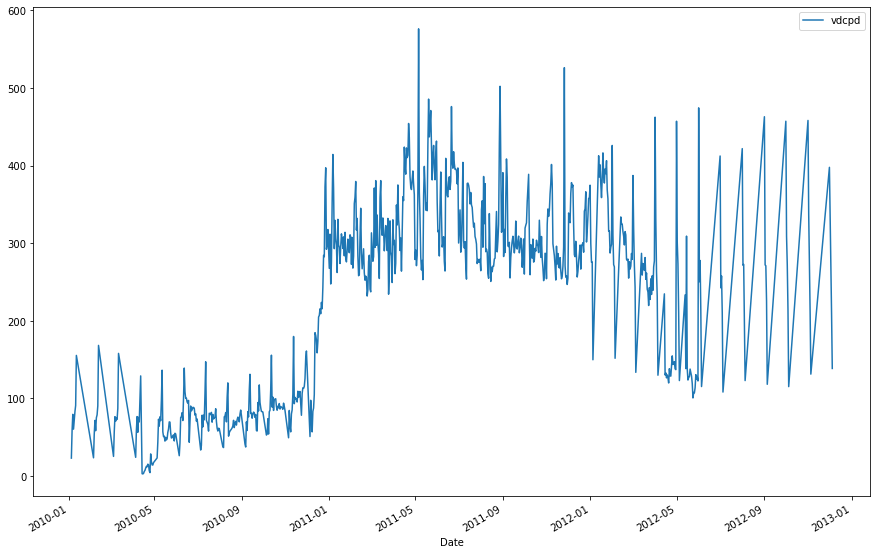

In [13]:
df.plot(figsize=(15,10))

#### seasonal_decompose to know trend, seasonal, residual

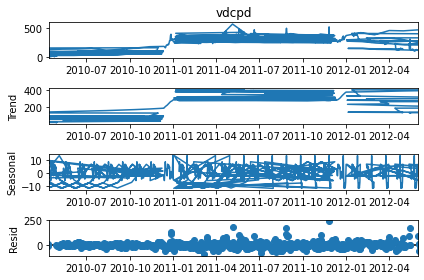

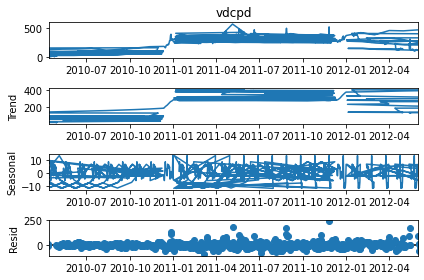

In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['vdcpd'], period=30)
decomposition.plot()

In [24]:
#adfuller to know if time series is stationary

from statsmodels.tsa.stattools import adfuller

adfuller(df['vdcpd'])

(-2.0239081587678784,
 0.2761895781339685,
 4,
 774,
 {'1%': -3.4388268991356936,
  '5%': -2.8652813916285518,
  '10%': -2.5687622857867782},
 7230.04420391785)

In [25]:
#P-value is 0.276

In [26]:
def adf_check(time_series):
    result =adfuller(time_series)
    print('---Augmented Dickey Fuller Test Result---')
    print('-----------------------------------------')
    print(f'ADF Test Statistic      : {result[0]}')
    print(f'P-Value                 : {result[1]}')
    print(f'Number of Lags          : {result[2]}')
    print(f'Number of Observations  : {result[3]}')
    print('-----------------------------------------')
    if result[1] <= 0.05:
        print('Time series is stationary')
    else:
        print('Time series is not stationary')

In [27]:
adf_check(df['vdcpd'])

---Augmented Dickey Fuller Test Result---
-----------------------------------------
ADF Test Statistic      : -2.0239081587678784
P-Value                 : 0.2761895781339685
Number of Lags          : 4
Number of Observations  : 774
-----------------------------------------
Time series is not stationary


In [28]:
df['vdcpd_1st_diff'] = df['vdcpd'] - df['vdcpd'].shift(1)

In [29]:
df.head()

,vdcpd,vdcpd_1st_diff
Date,,
2010-04-14,3.1,NaN
2010-04-15,2.8,-0.3
2010-04-16,3.5,0.7
2010-04-17,6.0,2.5
2010-04-18,7.4,1.4


In [30]:
adf_check(df['vdcpd_1st_diff'].dropna())

---Augmented Dickey Fuller Test Result---
-----------------------------------------
ADF Test Statistic      : -19.415712250694465
P-Value                 : 0.0
Number of Lags          : 3
Number of Observations  : 774
-----------------------------------------
Time series is stationary


In [31]:
# now P-value is less than 0.05
# d=1   (P-value got less than 1 on 1st difference)

seasonal_decompose for checking seasonality

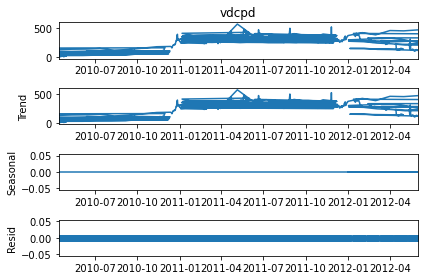

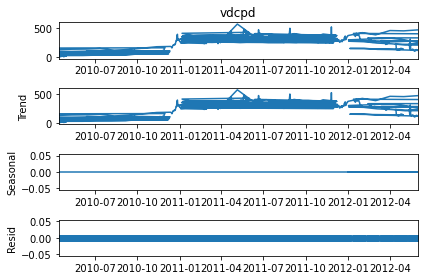

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['vdcpd'], period=1)
decomposition.plot()

plot_pacf for finding the p value

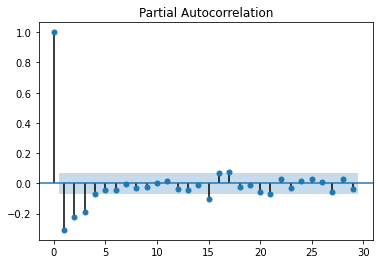

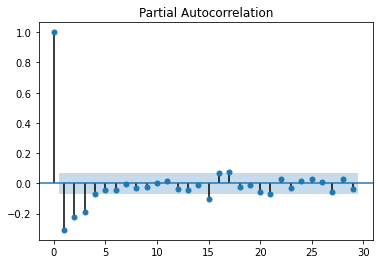

In [51]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(df['vdcpd_1st_diff'].dropna())

In [52]:
#p value is considering as zero as there is no correlation with previous values (all nearest values are less than 0.5)

AR              I              MA
p=0            d=1             q
P               D              Q

plot_acf to find q value

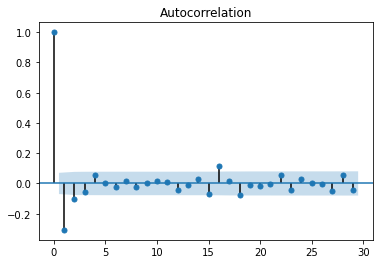

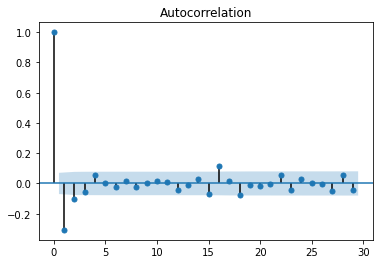

In [53]:
plot_acf(df['vdcpd_1st_diff'].dropna())

AR              I              MA
p=0            d=1            q=0    #related to trend
P               D              Q     # related to seasonality

In [55]:
df['seasonal_difference'] = df['vdcpd'] - df['vdcpd'].shift(30)

In [58]:
df

,vdcpd,vdcpd_1st_diff,seasonal_difference
Date,,,
2010-04-14,3.1,NaN,NaN
2010-04-15,2.8,-0.3,NaN
2010-04-16,3.5,0.7,NaN
2010-04-17,6.0,2.5,NaN
2010-04-18,7.4,1.4,NaN
...,...,...,...
2012-05-27,113.8,6.6,-30.8
2012-05-28,130.7,16.9,-16.8
2012-05-29,124.9,-5.8,-13.4


In [59]:
adf_check(df['seasonal_difference'].dropna())

---Augmented Dickey Fuller Test Result---
-----------------------------------------
ADF Test Statistic      : -4.758321410770342
P-Value                 : 6.530101691628692e-05
Number of Lags          : 3
Number of Observations  : 745
-----------------------------------------
Time series is stationary


In [64]:
#P-value is less than 0.05, so D=1

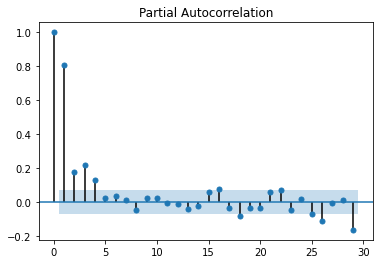

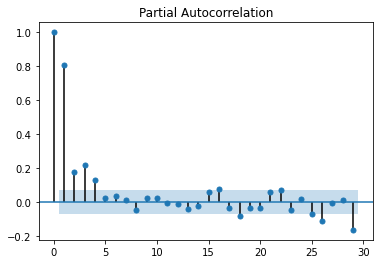

In [65]:
plot_pacf(df['seasonal_difference'].dropna())

In [66]:
# P = 1

In [ ]:
AR              I              MA
p=0            d=1            q=0    #related to trend
P=1            D=1              Q     # related to seasonality

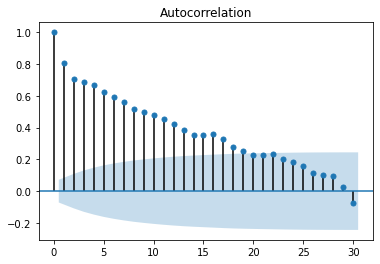

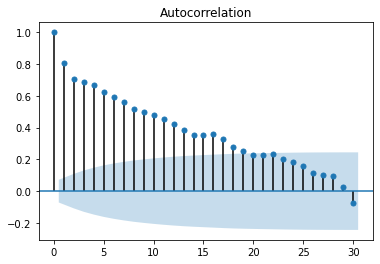

In [67]:
plot_acf(df['seasonal_difference'].dropna(), lags=30)

In [68]:
#looks like 12 previous days are important
#Q=12

In [ ]:
AR              I              MA
p=0            d=1            q=0    #related to trend
P=1            D=1             Q=12     # related to seasonality

In [69]:
# try to create a ARIMA (0,1,0)(1,1,12)

In [70]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [71]:
model = sm.tsa.statespace.SARIMAX(df['vdcpd'], order=(0,1,0), seasonal_order=(1,1,12,30))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:216: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:220: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

In [72]:
result = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [73]:
print(result.summary())

                                                        SARIMAX Results                                                         
Dep. Variable:                                                                    vdcpd   No. Observations:                  779
Model:             SARIMAX(0, 1, 0)x(1, 1, [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 30)   Log Likelihood               -3672.045
Date:                                                                  Sun, 23 Aug 2020   AIC                           7372.090
Time:                                                                          08:05:37   BIC                           7436.733
Sample:                                                                               0   HQIC                          7397.001
                                                                                  - 779                                         
Covariance Type:                                                                    opg          

In [75]:
df['forecast'] = result.predict(start=701, end=778)

In [76]:
df

,vdcpd,vdcpd_1st_diff,seasonal_difference,forecast
Date,,,,
2010-04-14,3.1,NaN,NaN,NaN
2010-04-15,2.8,-0.3,NaN,NaN
2010-04-16,3.5,0.7,NaN,NaN
2010-04-17,6.0,2.5,NaN,NaN
2010-04-18,7.4,1.4,NaN,NaN
...,...,...,...,...
2012-05-27,113.8,6.6,-30.8,108.397697
2012-05-28,130.7,16.9,-16.8,108.913988
2012-05-29,124.9,-5.8,-13.4,136.114232


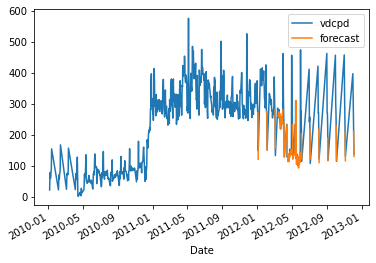

In [77]:
df[['vdcpd', 'forecast']].plot()

In [85]:
future_dt = pd.Series(pd.date_range('2012-06-01', periods=60, freq='D'))

In [86]:
future_dt

0    2012-06-01
1    2012-06-02
2    2012-06-03
3    2012-06-04
4    2012-06-05
5    2012-06-06
6    2012-06-07
7    2012-06-08
8    2012-06-09
9    2012-06-10
10   2012-06-11
11   2012-06-12
12   2012-06-13
13   2012-06-14
14   2012-06-15
15   2012-06-16
16   2012-06-17
17   2012-06-18
18   2012-06-19
19   2012-06-20
20   2012-06-21
21   2012-06-22
22   2012-06-23
23   2012-06-24
24   2012-06-25
25   2012-06-26
26   2012-06-27
27   2012-06-28
28   2012-06-29
29   2012-06-30
30   2012-07-01
31   2012-07-02
32   2012-07-03
33   2012-07-04
34   2012-07-05
35   2012-07-06
36   2012-07-07
37   2012-07-08
38   2012-07-09
39   2012-07-10
40   2012-07-11
41   2012-07-12
42   2012-07-13
43   2012-07-14
44   2012-07-15
45   2012-07-16
46   2012-07-17
47   2012-07-18
48   2012-07-19
49   2012-07-20
50   2012-07-21
51   2012-07-22
52   2012-07-23
53   2012-07-24
54   2012-07-25
55   2012-07-26
56   2012-07-27
57   2012-07-28
58   2012-07-29
59   2012-07-30
dtype: datetime64[ns]

In [87]:
future_dt_df = pd.DataFrame(index=future_dt, columns=df.columns)

In [88]:
future_dt_df

,vdcpd,vdcpd_1st_diff,seasonal_difference,forecast
2012-06-01,NaN,NaN,NaN,NaN
2012-06-02,NaN,NaN,NaN,NaN
2012-06-03,NaN,NaN,NaN,NaN
2012-06-04,NaN,NaN,NaN,NaN
2012-06-05,NaN,NaN,NaN,NaN
2012-06-06,NaN,NaN,NaN,NaN
2012-06-07,NaN,NaN,NaN,NaN
2012-06-08,NaN,NaN,NaN,NaN
2012-06-09,NaN,NaN,NaN,NaN
2012-06-10,NaN,NaN,NaN,NaN


In [89]:
future_df = pd.concat([df, future_dt_df])

In [90]:
future_df

,vdcpd,vdcpd_1st_diff,seasonal_difference,forecast
2010-04-14,3.1,NaN,NaN,NaN
2010-04-15,2.8,-0.3,NaN,NaN
2010-04-16,3.5,0.7,NaN,NaN
2010-04-17,6.0,2.5,NaN,NaN
2010-04-18,7.4,1.4,NaN,NaN
...,...,...,...,...
2012-07-26,NaN,NaN,NaN,NaN
2012-07-27,NaN,NaN,NaN,NaN
2012-07-28,NaN,NaN,NaN,NaN
2012-07-29,NaN,NaN,NaN,NaN


In [101]:
future_df['forecast'] = result.predict()

In [102]:
future_df

,vdcpd,vdcpd_1st_diff,seasonal_difference,forecast
2010-04-14,3.1,NaN,NaN,0.0
2010-04-15,2.8,-0.3,NaN,3.1
2010-04-16,3.5,0.7,NaN,2.8
2010-04-17,6.0,2.5,NaN,3.5
2010-04-18,7.4,1.4,NaN,6.0
...,...,...,...,...
2012-07-26,NaN,NaN,NaN,NaN
2012-07-27,NaN,NaN,NaN,NaN
2012-07-28,NaN,NaN,NaN,NaN
2012-07-29,NaN,NaN,NaN,NaN


In [103]:
future_df.to_csv(r'E:\result.csv')

In [114]:
future_df.iloc[779:790,:]

,vdcpd,vdcpd_1st_diff,seasonal_difference,forecast
2012-06-01,NaN,NaN,NaN,453.815056
2012-06-02,NaN,NaN,NaN,298.560477
2012-06-03,NaN,NaN,NaN,270.526985
2012-06-04,NaN,NaN,NaN,203.402702
2012-06-05,NaN,NaN,NaN,123.270387
2012-06-06,NaN,NaN,NaN,NaN
2012-06-07,NaN,NaN,NaN,NaN
2012-06-08,NaN,NaN,NaN,NaN
2012-06-09,NaN,NaN,NaN,NaN
2012-06-10,NaN,NaN,NaN,NaN


###### out of 60 days prediction attempted, only 10 days (first 5 days of each month) are getting predicted. Need to check further.